# Open Image v7 Object detection using YOLOv8

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/drive/1RtPTmGTpYKN7KiABjWfEaLc4l4EeCRxt?usp=drive_link">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/mmravak/object-detection-yolov8">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

Welcome to the [Object Detection YOLOv8](https://docs.ultralytics.com/models/yolov8/). This notebook will walk you through the process of using a pre-trained model to detect objects in an image.

# Setup

Important: If you're running on a local machine, be sure to follow the [installation instructions](https://github.com/mmravak/object-detection-yolov8/blob/main/README.md). This notebook includes only what's necessary to run in Colab.

### Install

Install `ultralytics` library for the task object detection that contains YOLOv8 model


In [ ]:
!pip install ultralytics

Install `fiftyone` library for loading and analyzing the dataset.

In [ ]:
!pip install fiftyone

### Imports

We need to import `fiftyone.zoo` that povides a collection of common datasets that we can download and load.

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

Migrating database to v0.23.4


INFO:fiftyone.migrations.runner:Migrating database to v0.23.4


In [ ]:
from ultralytics.utils import SETTINGS, Path

In [ ]:
import warnings

We need to import the `YOLO` class that represents an implementation of the YOLO object detection algorithm.

In [ ]:
from ultralytics import YOLO

Other imports that we need in this implementation.

In [ ]:
import os
import cv2
from IPython.display import Image

### Dataset

In [ ]:
# List available zoo datasets
print(foz.list_zoo_datasets())

['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'kitti-multiview', 'lfw', 'mnist', 'open-images-v6', 'open-images-v7', 'quickstart', 'quickstart-geo', 'quickstart-groups', 'quickstart-video', 'sama-coco', 'ucf101', 'voc-2007', 'voc-2012']


For this task, we will use OpenImagesV7 Dataset.

In [ ]:
name = 'open-images-v7'

First, we need to load a dataset and then export it into the YOLO format using the fiftyone library.

Typically, datasets come with a YAML (Yet Another Markup Language) file that delineates the dataset's configuration.
For accurate paths and configurations, we use the dataset's official repository and [documentation](https://docs.ultralytics.com/datasets/detect/open-images-v7/#dataset-yaml).

In [ ]:
for split in 'train', 'validation':
    train = split == 'train'

    # Load Open Images dataset
    dataset = foz.load_zoo_dataset(name,
                                   split = split,
                                   label_types = ['detections'],
                                   dataset_dir = Path(SETTINGS['datasets_dir']) / 'fiftyone' / name,
                                   classes = ['Sheep', 'Owl'],
                                   max_samples = 1000)


    # Define classes (Sheep and Owl)
    if train:
        classes = ['Sheep', 'Owl']

    # Export to YAML file
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="fiftyone.utils.yolo")
        dataset.export(export_dir = str(Path(SETTINGS['datasets_dir']) / name),
                       dataset_type = fo.types.YOLOv5Dataset,
                       label_field = 'ground_truth',
                       split = 'val' if split == 'validation' else split,
                       classes = classes,
                       overwrite = train)

We display the specified dataset view using FiftyOne App. The app allows to visualize images, inspect annotations, and perform various analysis tasks on the dataset interactively. There are `1000` samples in train set, and `92` samples in validation set.

In [ ]:
session = fo.launch_app(dataset.view())

###Model

The YOLOv8 series offers a diverse range of [models](https://docs.ultralytics.com/models/yolov8/#supported-tasks-and-modes), each specialized for specific tasks in computer vision. For this task, we will use one pretrained model which is designed for object detection.

In [ ]:
# Load the pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Display model information
model.info()

####Training

We will train YOLOv8n model on the Open Images v7 dataset for `20` epochs at image size `640`.

In [ ]:
# Train the model on the dataset for 20 epochs
results = model.train(data='/content/datasets/open-images-v7/dataset.yaml', epochs=20, imgsz = 640)

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/open-images-v7/dataset.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/open-images-v7/labels/train... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 1463.21it/s]


train: New cache created: /content/datasets/open-images-v7/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/open-images-v7/labels/val... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 1500.50it/s]

val: New cache created: /content/datasets/open-images-v7/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.44G      1.032      2.183      1.299         38        640: 100%|██████████| 63/63 [00:41<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all         92        152      0.595      0.447      0.499       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.3G       1.16      1.782      1.387         31        640: 100%|██████████| 63/63 [00:35<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         92        152      0.492      0.457      0.467      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.28G      1.251       1.81      1.454         36        640: 100%|██████████| 63/63 [00:34<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         92        152      0.577      0.475      0.452      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.44G      1.257      1.715      1.451         32        640: 100%|██████████| 63/63 [00:36<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         92        152      0.369      0.513      0.349      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.3G      1.244      1.686      1.468         33        640: 100%|██████████| 63/63 [00:41<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         92        152      0.325      0.683      0.415      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.48G      1.221      1.575      1.428         27        640: 100%|██████████| 63/63 [00:35<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         92        152      0.419      0.461      0.393      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.36G      1.227      1.519      1.437         34        640: 100%|██████████| 63/63 [00:36<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         92        152      0.554      0.626      0.624      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.3G      1.131      1.417       1.37         23        640: 100%|██████████| 63/63 [00:36<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all         92        152      0.583       0.61      0.602      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.28G      1.148      1.353      1.394         53        640: 100%|██████████| 63/63 [00:33<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         92        152      0.593      0.513      0.526      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.48G      1.081      1.288      1.329         29        640: 100%|██████████| 63/63 [00:34<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]

                   all         92        152      0.552      0.613      0.605      0.434


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.38G      1.115      1.368      1.393         16        640: 100%|██████████| 63/63 [00:39<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         92        152      0.677      0.653      0.661      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.41G      1.078      1.241      1.349         16        640: 100%|██████████| 63/63 [00:31<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         92        152      0.664      0.613      0.653      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.46G      1.029      1.164      1.316         20        640: 100%|██████████| 63/63 [00:32<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         92        152      0.599      0.676      0.682      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.41G     0.9922      1.081      1.277         10        640: 100%|██████████| 63/63 [00:32<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         92        152      0.754      0.666      0.736      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.28G     0.9675      1.021      1.263         11        640: 100%|██████████| 63/63 [00:31<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         92        152      0.666      0.662      0.691       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.28G     0.9484      1.007      1.236         11        640: 100%|██████████| 63/63 [00:34<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         92        152      0.705      0.666      0.692      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.41G      0.921      0.937      1.226         12        640: 100%|██████████| 63/63 [00:32<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         92        152      0.739      0.654      0.724      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.46G     0.8956     0.8707      1.202         17        640: 100%|██████████| 63/63 [00:32<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all         92        152      0.779      0.682      0.735       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.44G     0.8704     0.8249      1.184         13        640: 100%|██████████| 63/63 [00:32<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         92        152      0.711      0.716      0.741      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.3G     0.8244     0.8042      1.156         25        640: 100%|██████████| 63/63 [00:31<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         92        152       0.72      0.727      0.753      0.609



20 epochs completed in 0.220 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all         92        152       0.72      0.727      0.754      0.609
                 Sheep         92        122      0.573      0.582      0.565      0.398
                   Owl         92         30      0.867      0.871      0.942       0.82
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.save('trained_yolov8n.pt')

 #### Evaluation

 We can see evaluation process and metrics in folder `/content/runs/detect/train`.

 The [F1 curve](https://github.com/mmravak/object-detection-yolov8/blob/main/runs/detect/train/F1_curve.png) allows us to visualize how changes in the confidence threshold impact the model's overall performance. The `F1 score = 0.73` peaks at the confidence threshold of `0.444` for all classes (highest point on the curve).

 The model's performance on some samples of validation set is shown here.

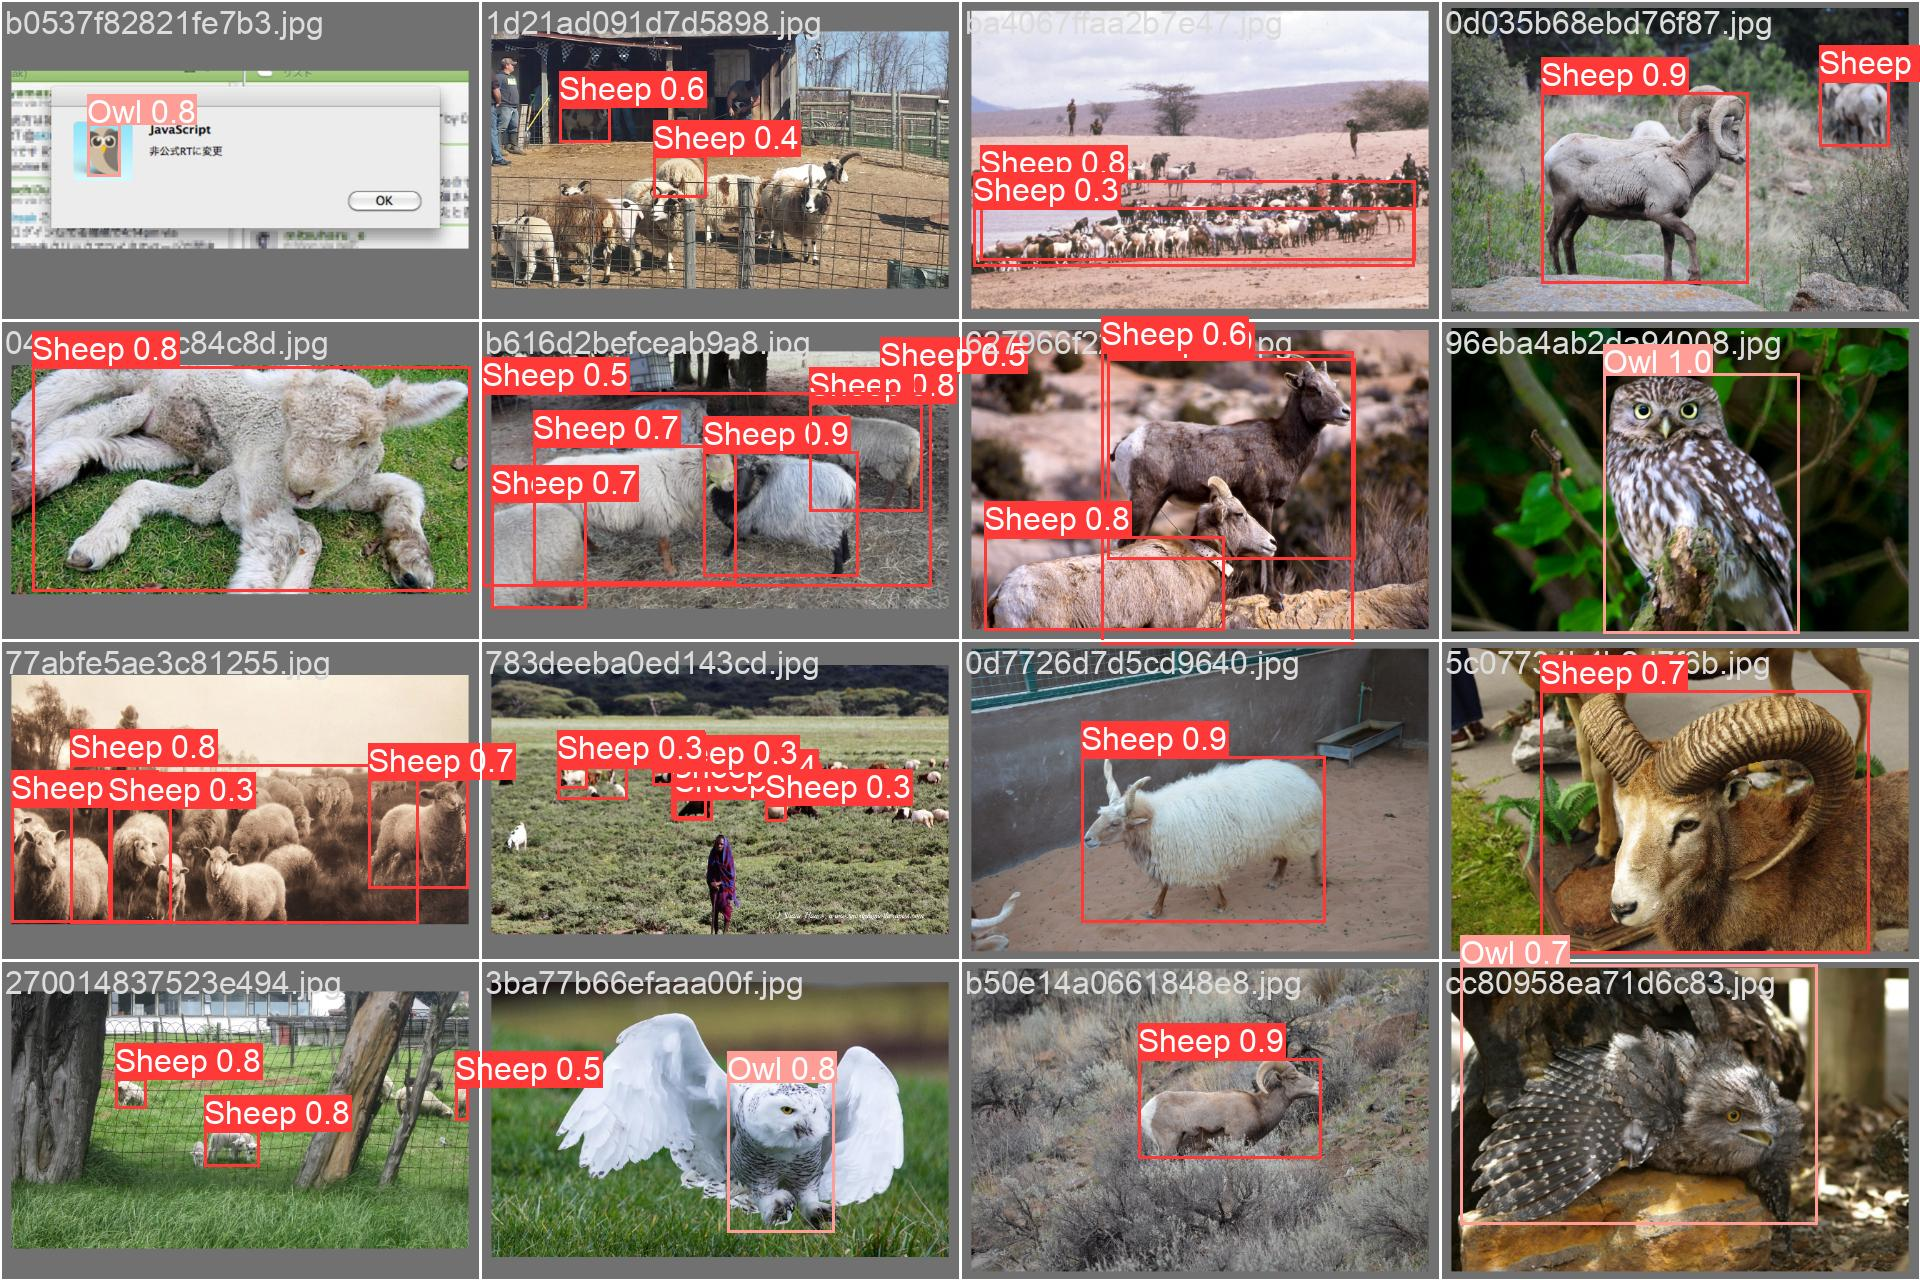

In [47]:
Image('/content/runs/detect/train/val_batch0_pred.jpg', width = 900)

Lets use a model to make prediction on one image from my data folder using the file path.

In [ ]:
results_img= model('/content/data/o6.jpg')


image 1/1 /content/data/o6.jpg: 384x640 5 Owls, 176.6ms
Speed: 16.0ms preprocess, 176.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


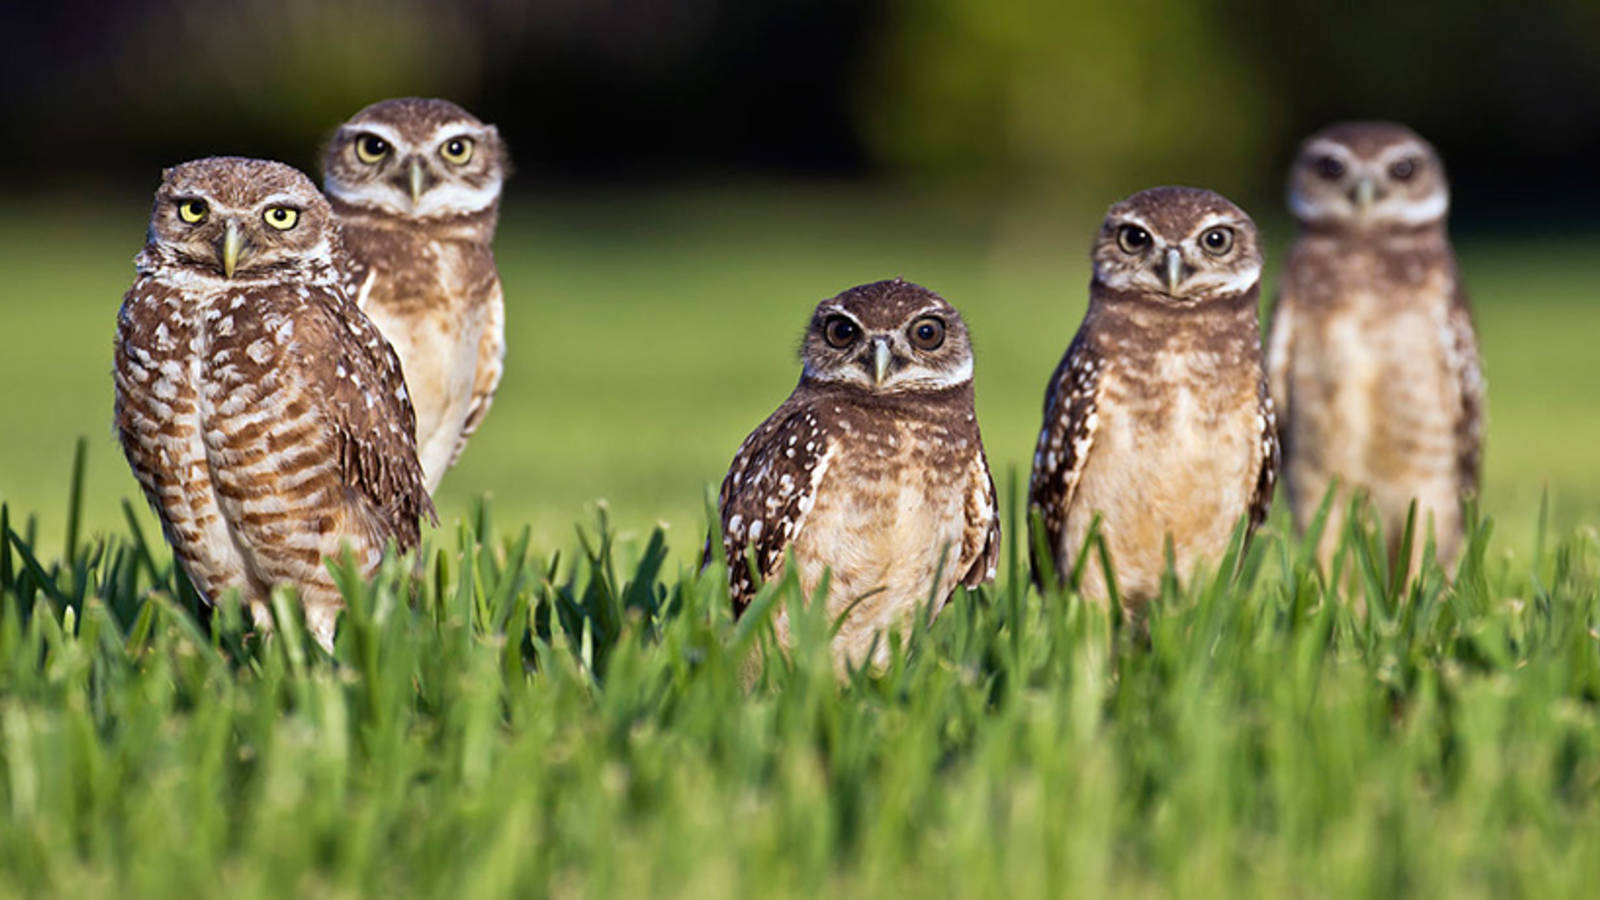

In [ ]:
# Display the image to see is the prediction correct
Image('/content/data/o6.jpg', width = 300)

#### Additionally: Evaluation using video file

This section uses code from the following [GitHub repository](https://github.com/computervisioneng/train-yolov8-custom-dataset-step-by-step-guide) to evaluate YOLO model on a video using the file path.

First, we set up a directory path for videos and construct the input and output video file path.

In [ ]:
# video_path = /content/data/owls.mp4'
video_path = '/content/data/sheeps.mp4'
video_path_out = '{}_out.mp4'.format(video_path[:-4])

Initializing video capture and output

In [ ]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

Loading YOLO8 model

In [ ]:
model_path = '/content/trained_yolov8n.pt'

# Load a model
model = YOLO(model_path)  # load a custom model

Object detection loop


In [ ]:
# Set a detection confidence threshold
threshold = 0.5

# Runs the YOLO model on each frame of the input video
while ret:

    results = model(frame)[0]

    # Iteration through the detected objects
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        # Draw rectangles and labels on for detected objects
        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    # Write the processed frame to the output
    out.write(frame)
    # Read next frame from input
    ret, frame = cap.read()

# Releasing resources
cap.release()
out.release()
cv2.destroyAllWindows()


Results are saved in [`/content/data/sheeps_out.mp4`](https://github.com/mmravak/object-detection-yolov8/blob/main/data/sheeps_out.mp4).